In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_df = pd.read_pickle('stock_data/main_df_ver01.pkl')
main_df.head(10)

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5
Date,,,,,,,,,,,
2006-12-28,12501,1.267400e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-29,12463,1.615600e+08,NaN,NaN,NaN,NaN,12501.0,NaN,NaN,NaN,NaN
2006-12-30,12465,1.946880e+08,NaN,NaN,NaN,NaN,12463.0,12501.0,NaN,NaN,NaN
2006-12-31,12467,2.278160e+08,NaN,NaN,NaN,NaN,12465.0,12463.0,12501.0,NaN,NaN
2007-01-01,12469,2.609440e+08,NaN,NaN,NaN,NaN,12467.0,12465.0,12463.0,12501.0,NaN
2007-01-02,12472,2.940720e+08,0.069864,0.861136,0.069091,0.151495,12469.0,12467.0,12465.0,12463.0,12501.0
2007-01-03,12474,3.272000e+08,0.058939,0.853915,0.087122,0.178637,12472.0,12469.0,12467.0,12465.0,12463.0
2007-01-04,12480,2.590600e+08,0.070704,0.857378,0.071918,0.052613,12474.0,12472.0,12469.0,12467.0,12465.0
2007-01-05,12398,2.352200e+08,0.040126,0.872667,0.087198,0.228902,12480.0,12474.0,12472.0,12469.0,12467.0


In [3]:
main_df = main_df.dropna()
main_df

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5
Date,,,,,,,,,,,
2007-01-02,12472,2.940720e+08,0.069864,0.861136,0.069091,0.151495,12469.0,12467.0,12465.0,12463.0,12501.0
2007-01-03,12474,3.272000e+08,0.058939,0.853915,0.087122,0.178637,12472.0,12469.0,12467.0,12465.0,12463.0
2007-01-04,12480,2.590600e+08,0.070704,0.857378,0.071918,0.052613,12474.0,12472.0,12469.0,12467.0,12465.0
2007-01-05,12398,2.352200e+08,0.040126,0.872667,0.087198,0.228902,12480.0,12474.0,12472.0,12469.0,12467.0
2007-01-06,12406,2.313133e+08,0.055274,0.865779,0.078929,0.101673,12398.0,12480.0,12474.0,12472.0,12469.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,19945,1.585400e+08,0.069263,0.851158,0.079526,0.032974,19942.0,19939.0,19936.0,19933.0,19918.0
2016-12-28,19833,1.883500e+08,0.087544,0.800140,0.112281,0.076089,19945.0,19942.0,19939.0,19936.0,19933.0
2016-12-29,19819,1.720400e+08,0.122357,0.762929,0.114821,-0.122968,19833.0,19945.0,19942.0,19939.0,19936.0


In [4]:
train_end = '2014-12-31'
test_start = '2015-01-01'
train_x = main_df.loc[:train_end]
test_x = main_df.loc[test_start:]
train_y = train_x.Close
test_y = test_x.Close
train_x = train_x.drop(columns='Close')
test_x = test_x.drop(columns='Close')

In [5]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

RandomForestRegressor()

In [6]:
pred = rf.predict(test_x)
pred = pd.DataFrame(data=pred, index=test_x.index, columns=['pred'])
pred

,pred
Date,
2015-01-01,17762.02
2015-01-02,17758.66
2015-01-03,17742.68
2015-01-04,17698.38
2015-01-05,17549.34
...,...
2016-12-27,17931.00
2016-12-28,17925.98
2016-12-29,17925.32


In [7]:
mean_squared_error(test_y, pred)

219707.0135712723

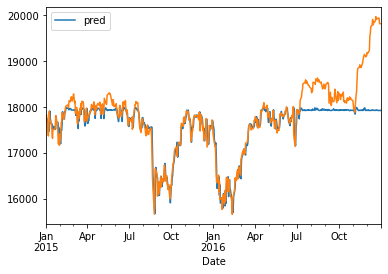

In [8]:
ax = pred.plot()
fig = test_y.plot(ax=ax)

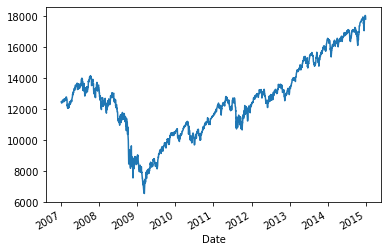

In [9]:
train_y.plot();